In [1]:
# 생선의 길이
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 생선의 무게
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 총 49개의 sample, 35개는 training dataset, 14개는 test dataset
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35+[0]*14

In [6]:
# 이제 여기서 train data, test data를 분류해서 data를 input 합니다.
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [9]:
# Test Dataset에서 평가하기
# k-최근접 이웃

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) 
# kn - 머신러닝 모델. fit - 두 데이터를 학습시켜 도미를 찾기 위한 기준을 찾는다.
kn.score(test_input, test_target)
# 정확도가 0%면 test_data가 있는 데이터가 비정확 -> 한쪽에는 도미만 있고, 한쪽에는 빙어만 있다는거
# 이 현상을 샘플링 편향 문제라고 한다. 그래서 데이터 셋이 골고루 섞이게 해야 한다. 하하

0.0

In [14]:
# 그래서 데이터셋이 골고루 섞이게 해야 해서, numpy library (행렬)사용
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [15]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [16]:
# (sample 수, 특성 수 제공)
print(input_arr.shape)

(49, 2)


In [19]:
# 데이터 섞기 - index를 섞어서 분류하는 방법.
np.random.seed(42) # "42"라는 고정된 숫자를 시드로 설정함으로써, 해당 세션에서 NumPy로 생성된 모든 랜덤 번호가 스크립트를 실행할 때마다 동일하게 유지됩니다.
index = np.arange(49) # 0~48개의 인덱스를 만들어서 mix
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [25]:
# 이제 여기서 train data, test data를 분류해서 data를 input 합니다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [26]:
# data 확인
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


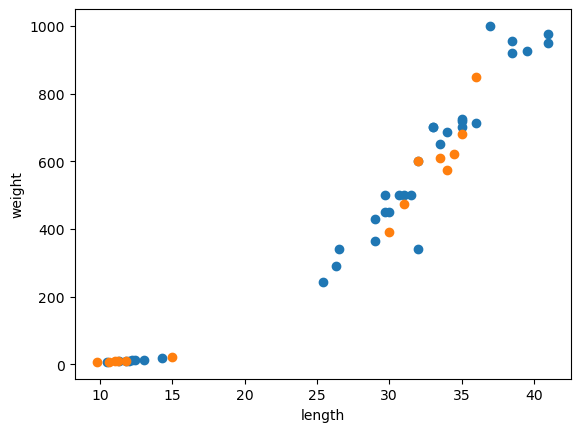

In [27]:
# 데이터 나누고 확인(by plot)
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [28]:
# 머신러닝
kn.fit(train_input, train_target)
kn.score(train_input, train_target) 

1.0